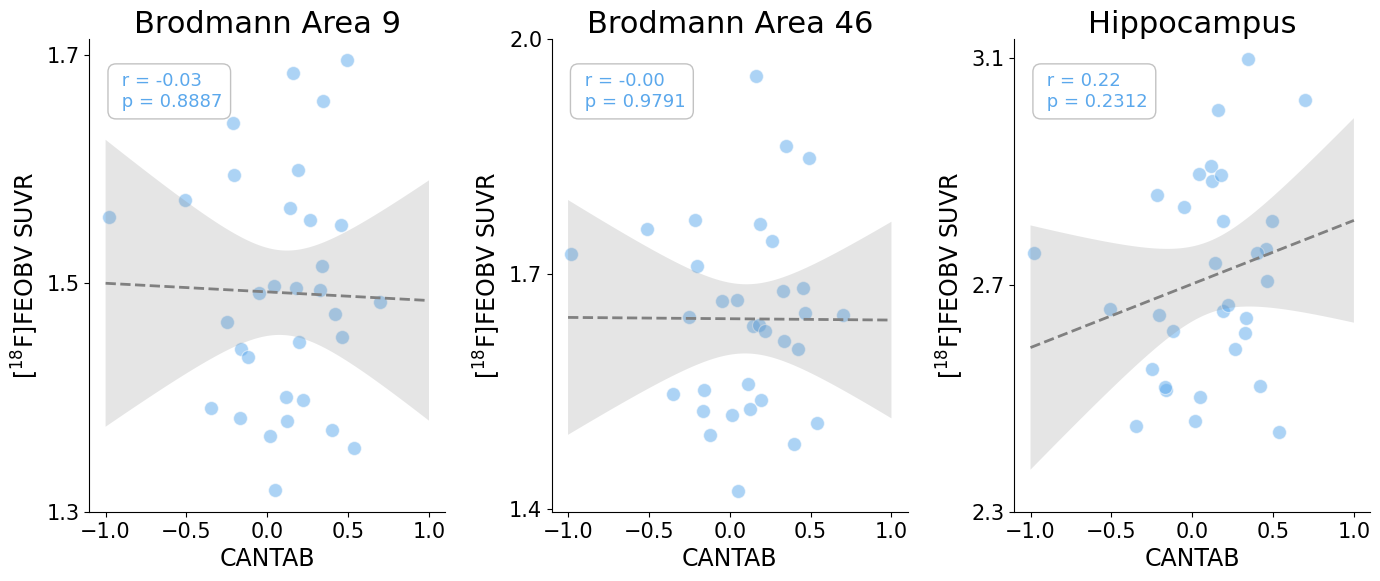

In [24]:
####### Supplementary Figure 1: SUVRs by CANTAB composite scores (Control Group)

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd



# Define ROI info
ROI_info = {
	'BA9': {'label': 'Brodmann Area 9', 'ROI_ticks': [1.3, 1.5, 1.7]},
	'Area_46': {'label': 'Brodmann Area 46', 'ROI_ticks': [1.4, 1.7, 2]},
	'HIP': {'label': 'Hippocampus', 'ROI_ticks': [2.3, 2.7, 3.1]},
}

# Variables
X_var = 'CANTAB_composite_score'
X_label = 'CANTAB'
xticks = [-1, -0.5, 0, 0.5, 1]
prediction_lower = -1
prediction_upper = 1

# Colors
control_color = '#5BA8EC'

# Load data
masterfile = pd.read_csv('data/masterfile_final_18patients_and_33controls.csv')
patients_only = masterfile[masterfile['Group'] == 'Control'].copy()

# Create figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for ax, ROI in zip(axes, ['BA9', 'Area_46', 'HIP']):
	subset = patients_only[[ROI, X_var]].dropna()
	
	# Fit linear model using statsmodels
	X = subset[X_var]
	y = subset[ROI]
	X_const = sm.add_constant(X)
	model = sm.OLS(y, X_const).fit()

	# Prediction range (EXTENDED)
	x_pred = np.linspace(prediction_lower, prediction_upper, 200)
	x_pred_const = sm.add_constant(x_pred)
	y_pred = model.predict(x_pred_const)

	# Confidence intervals (95%)
	pred_summary = model.get_prediction(x_pred_const).summary_frame(alpha=0.05)
	lower = pred_summary['mean_ci_lower']
	upper = pred_summary['mean_ci_upper']

	# Scatter
	sns.scatterplot(
		data=subset,
		x=X_var,
		y=ROI,
		color=control_color,
		alpha=0.5,
		s=100,
		ax=ax
	)

	# Regression line
	ax.plot(x_pred, y_pred, color='grey', linestyle='--', linewidth=2)

	# Shaded confidence interval
	ax.fill_between(x_pred, lower, upper, color='grey', alpha=0.2, edgecolor='none')

	ax.set_title(f'{ROI_info[ROI]["label"]}', fontsize=22, pad=2)
	ax.set_ylabel(r'[$^{18}$F]FEOBV SUVR', fontsize=17)
	ax.set_yticks(ROI_info[ROI]['ROI_ticks'])
	ax.set_xlabel(X_label, fontsize=17)
	ax.set_xticks(xticks)
	# ax.set_xlim([-1.3, 0.7])
	ax.tick_params(axis='both', labelsize=15)
	sns.despine(ax=ax)

	# Correlation text
	r_val, p_val = stats.pearsonr(X, y)
	
	# Format p-value string
	if p_val < 0.0001:
		p_str = "p < 0.0001"
	else:
		p_str = f"p = {p_val:.4f}"
	
	ax.text(
		0.075, 0.93, f' r = {r_val:.2f}\n {p_str}',
		transform=ax.transAxes,
		fontsize=13,
		color=control_color,
		verticalalignment='top',
		horizontalalignment='left',
		bbox=dict(boxstyle='round,pad=0.45', edgecolor='darkgrey', facecolor='white', alpha=0.7)
	)


# Save and show
plt.tight_layout(pad=5.0)
plt.subplots_adjust(wspace=0.3)

plt.savefig(f'plots/Suppl-Figure-1__ROI-SUVRs_by_{X_var}_(Control-group).jpg', dpi=700, bbox_inches='tight')
plt.show()

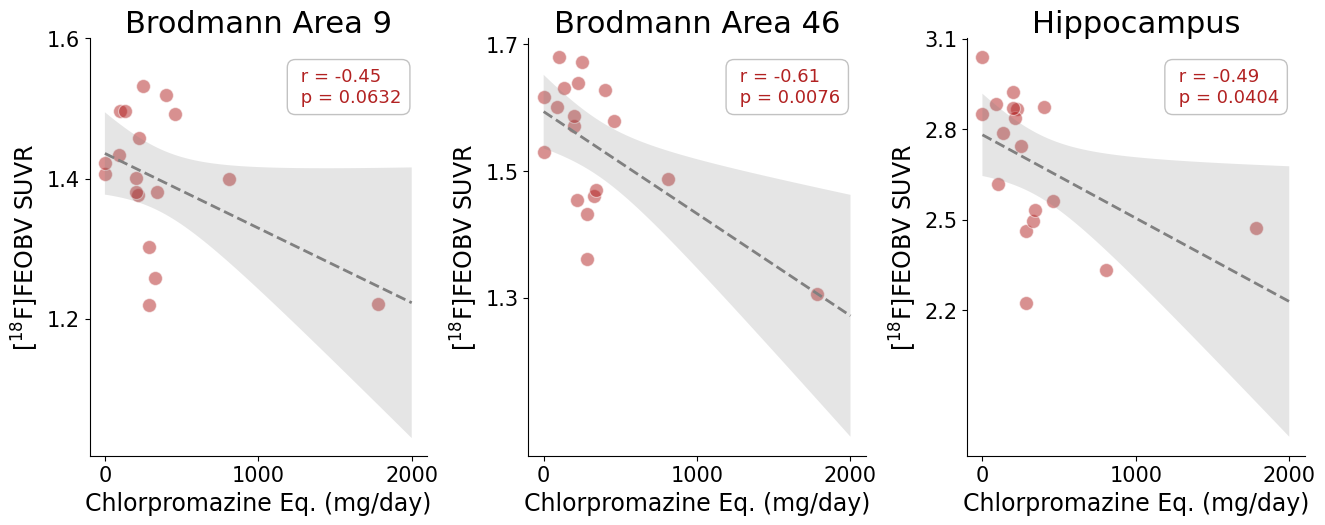

In [ ]:
####### Supplementary Figure 2: SUVRs by Daily Chlorpromazine Equivalents (Patient Group)

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd



# Define ROI info
ROI_info = {
	'BA9': {'label': 'Brodmann Area 9', 'ROI_ticks': [1.2, 1.4, 1.6]},
	'Area_46': {'label': 'Brodmann Area 46', 'ROI_ticks': [1.3, 1.5, 1.7]},
	'HIP': {'label': 'Hippocampus', 'ROI_ticks': [2.2, 2.5, 2.8, 3.1]},
}


# Variables
X_var = 'cz_eq'
X_label = 'Chlorpromazine Eq. (mg/day)'
xticks = [0, 1000, 2000]
prediction_lower = 0
prediction_upper = 2000

# Colors
patient_color = '#B22222'

# Load data
masterfile = pd.read_csv('data/masterfile_final_18patients_and_33controls.csv')
patients_only = masterfile[masterfile['Group'] == 'Schizophrenia'].copy()

# Create figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for ax, ROI in zip(axes, ['BA9', 'Area_46', 'HIP']):
	subset = patients_only[[ROI, X_var]].dropna()
	
	# Fit linear model using statsmodels
	X = subset[X_var]
	y = subset[ROI]
	X_const = sm.add_constant(X)
	model = sm.OLS(y, X_const).fit()

	# Prediction range (EXTENDED)
	x_pred = np.linspace(prediction_lower, prediction_upper, 200)
	x_pred_const = sm.add_constant(x_pred)
	y_pred = model.predict(x_pred_const)

	# Confidence intervals (95%)
	pred_summary = model.get_prediction(x_pred_const).summary_frame(alpha=0.05)
	lower = pred_summary['mean_ci_lower']
	upper = pred_summary['mean_ci_upper']

	# Scatter
	sns.scatterplot(
		data=subset,
		x=X_var,
		y=ROI,
		color=patient_color,
		alpha=0.5,
		s=100,
		ax=ax
	)

	# Regression line
	ax.plot(x_pred, y_pred, color='grey', linestyle='--', linewidth=2)

	# Shaded confidence interval
	ax.fill_between(x_pred, lower, upper, color='grey', alpha=0.2, edgecolor='none')

	ax.set_title(f'{ROI_info[ROI]["label"]}', fontsize=22, pad=2)
	ax.set_ylabel(r'[$^{18}$F]FEOBV SUVR', fontsize=17)
	ax.set_yticks(ROI_info[ROI]['ROI_ticks'])
	ax.set_xlabel(X_label, fontsize=17)
	ax.set_xticks(xticks)
	# ax.set_xlim([-1.3, 0.7])
	ax.tick_params(axis='both', labelsize=15)
	sns.despine(ax=ax)

	# Correlation text
	r_val, p_val = stats.pearsonr(X, y)
	
	# Format p-value string
	if p_val < 0.0001:
		p_str = "p < 0.0001"
	else:
		p_str = f"p = {p_val:.4f}"
	
	ax.text(
		0.61, 0.93, f' r = {r_val:.2f}\n {p_str}',
		transform=ax.transAxes,
		fontsize=13,
		color=patient_color,
		verticalalignment='top',
		horizontalalignment='left',
		bbox=dict(boxstyle='round,pad=0.45', edgecolor='darkgrey', facecolor='white', alpha=0.7)
	)


# Save and show
plt.tight_layout(pad=5.0)
plt.subplots_adjust(wspace=0.3)

plt.savefig(f'plots/Suppl-Figure-2__ROI-SUVRs_by_{X_var}_(Patient-group).jpg', dpi=700, bbox_inches='tight')
plt.show()

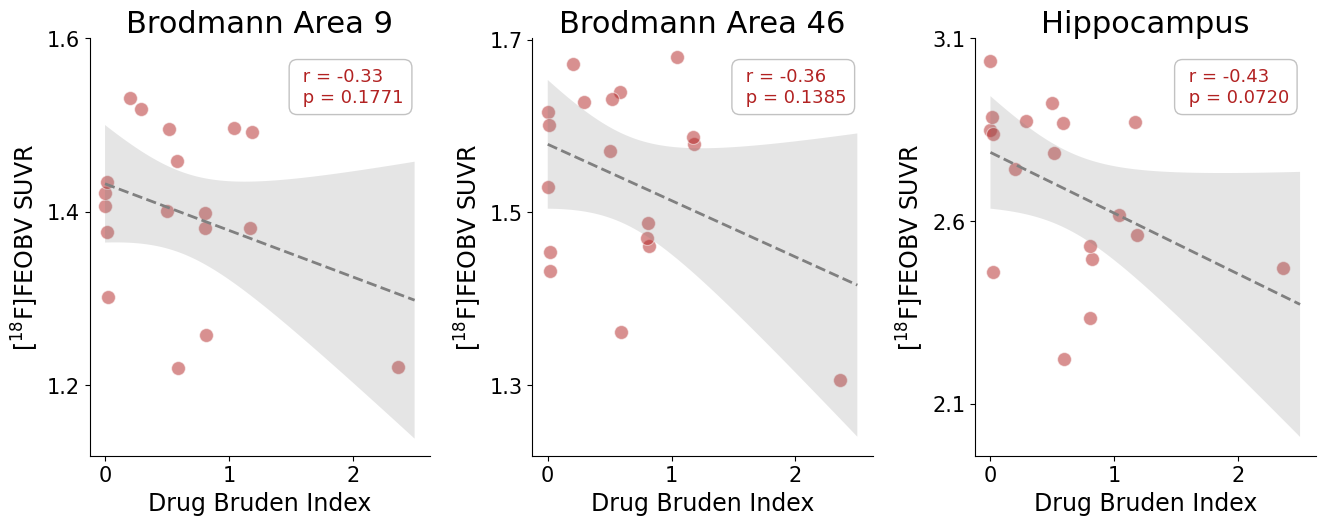

In [ ]:
####### Supplementary Figure 3: SUVRs by Drug Burden Index of antipsychotics (Patient Group)

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd



# Define ROI info
ROI_info = {
	'BA9': {'label': 'Brodmann Area 9', 'ROI_ticks': [1.2, 1.4, 1.6]},
	'BA46': {'label': 'Brodmann Area 46', 'ROI_ticks': [1.3, 1.5, 1.7]},
	'HIP': {'label': 'Hippocampus', 'ROI_ticks': [2.1, 2.6, 3.1]},
}


# Variables
X_var = 'DBI'
X_label = 'Drug Bruden Index'
xticks = [0, 1, 2]
prediction_lower = 0
prediction_upper = 2.5

# Colors
patient_color = '#B22222'

# Load data
masterfile = pd.read_csv('data/masterfile_final_18patients_and_33controls.csv')
patients_only = masterfile[masterfile['Group'] == 'Schizophrenia'].copy()

# Create figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for ax, ROI in zip(axes, ['BA9', 'Area_46', 'HIP']):
	subset = patients_only[[ROI, X_var]].dropna()
	
	# Fit linear model using statsmodels
	X = subset[X_var]
	y = subset[ROI]
	X_const = sm.add_constant(X)
	model = sm.OLS(y, X_const).fit()

	# Prediction range (EXTENDED)
	x_pred = np.linspace(prediction_lower, prediction_upper, 200)
	x_pred_const = sm.add_constant(x_pred)
	y_pred = model.predict(x_pred_const)

	# Confidence intervals (95%)
	pred_summary = model.get_prediction(x_pred_const).summary_frame(alpha=0.05)
	lower = pred_summary['mean_ci_lower']
	upper = pred_summary['mean_ci_upper']

	# Scatter
	sns.scatterplot(
		data=subset,
		x=X_var,
		y=ROI,
		color=patient_color,
		alpha=0.5,
		s=100,
		ax=ax
	)

	# Regression line
	ax.plot(x_pred, y_pred, color='grey', linestyle='--', linewidth=2)

	# Shaded confidence interval
	ax.fill_between(x_pred, lower, upper, color='grey', alpha=0.2, edgecolor='none')

	ax.set_title(f'{ROI_info[ROI]["label"]}', fontsize=22, pad=2)
	ax.set_ylabel(r'[$^{18}$F]FEOBV SUVR', fontsize=17)
	ax.set_yticks(ROI_info[ROI]['ROI_ticks'])
	ax.set_xlabel(X_label, fontsize=17)
	ax.set_xticks(xticks)
	# ax.set_xlim([-1.3, 0.7])
	ax.tick_params(axis='both', labelsize=15)
	sns.despine(ax=ax)

	# Correlation text
	r_val, p_val = stats.pearsonr(X, y)
	
	# Format p-value string
	if p_val < 0.0001:
		p_str = "p < 0.0001"
	else:
		p_str = f"p = {p_val:.4f}"
	
	ax.text(
		0.61, 0.93, f' r = {r_val:.2f}\n {p_str}',
		transform=ax.transAxes,
		fontsize=13,
		color=patient_color,
		verticalalignment='top',
		horizontalalignment='left',
		bbox=dict(boxstyle='round,pad=0.45', edgecolor='darkgrey', facecolor='white', alpha=0.7)
	)


# Save and show
plt.tight_layout(pad=5.0)
plt.subplots_adjust(wspace=0.3)

plt.savefig(f'plots/Suppl-Figure-3__ROI-SUVRs_by_{X_var}_(Patient-group).jpg', dpi=700, bbox_inches='tight')
plt.show()

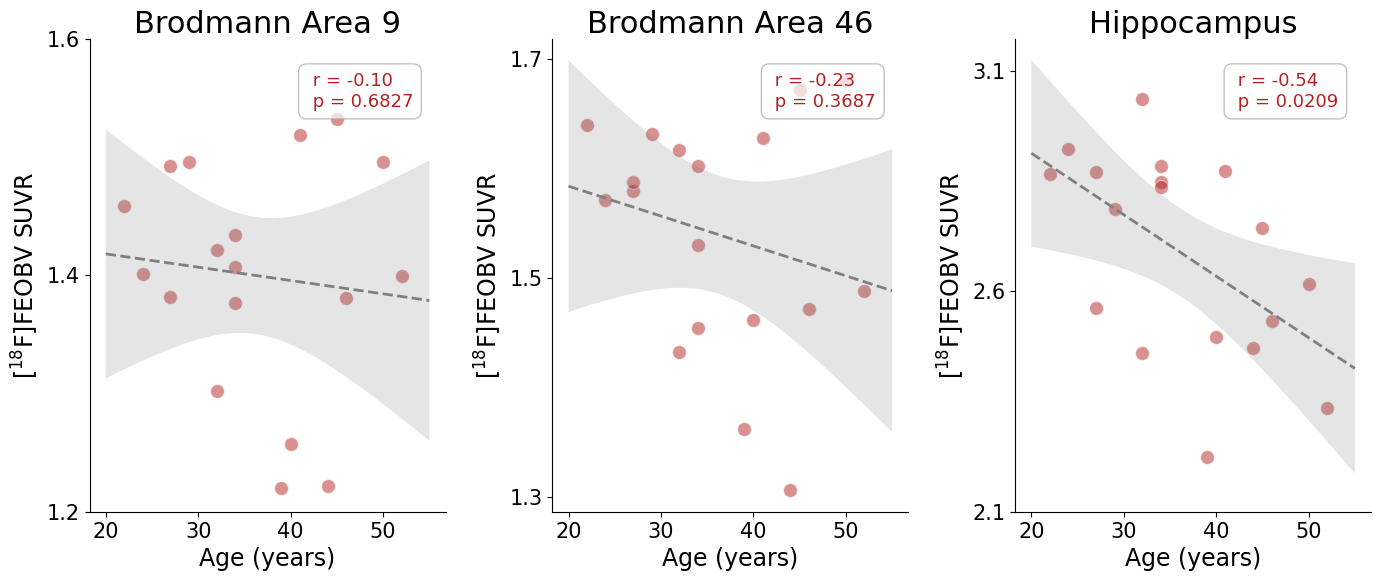

In [ ]:
####### Supplementary Figure 4: SUVRs by Age (Patient Group)

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd



# Define ROI info
ROI_info = {
	'BA9': {'label': 'Brodmann Area 9', 'ROI_ticks': [1.2, 1.4, 1.6]},
	'Area_46': {'label': 'Brodmann Area 46', 'ROI_ticks': [1.3, 1.5, 1.7]},
	'HIP': {'label': 'Hippocampus', 'ROI_ticks': [2.1, 2.6, 3.1]},
}


# Variables
X_var = 'dem_age'
X_label = 'Age (years)'
xticks = [20,30,40,50]
prediction_lower = 20
prediction_upper = 55

# Colors
patient_color = '#B22222'

# Load data
masterfile = pd.read_csv('data/masterfile_final_18patients_and_33controls.csv')
patients_only = masterfile[masterfile['Group'] == 'Schizophrenia'].copy()

# Create figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for ax, ROI in zip(axes, ['BA9', 'Area_46', 'HIP']):
	subset = patients_only[[ROI, X_var]].dropna()
	
	# Fit linear model using statsmodels
	X = subset[X_var]
	y = subset[ROI]
	X_const = sm.add_constant(X)
	model = sm.OLS(y, X_const).fit()

	# Prediction range (EXTENDED)
	x_pred = np.linspace(prediction_lower, prediction_upper, 200)
	x_pred_const = sm.add_constant(x_pred)
	y_pred = model.predict(x_pred_const)

	# Confidence intervals (95%)
	pred_summary = model.get_prediction(x_pred_const).summary_frame(alpha=0.05)
	lower = pred_summary['mean_ci_lower']
	upper = pred_summary['mean_ci_upper']

	# Scatter
	sns.scatterplot(
		data=subset,
		x=X_var,
		y=ROI,
		color=patient_color,
		alpha=0.5,
		s=100,
		ax=ax
	)

	# Regression line
	ax.plot(x_pred, y_pred, color='grey', linestyle='--', linewidth=2)

	# Shaded confidence interval
	ax.fill_between(x_pred, lower, upper, color='grey', alpha=0.2, edgecolor='none')

	ax.set_title(f'{ROI_info[ROI]["label"]}', fontsize=22, pad=2)
	ax.set_ylabel(r'[$^{18}$F]FEOBV SUVR', fontsize=17)
	ax.set_yticks(ROI_info[ROI]['ROI_ticks'])
	ax.set_xlabel(X_label, fontsize=17)
	ax.set_xticks(xticks)
	# ax.set_xlim([-1.3, 0.7])
	ax.tick_params(axis='both', labelsize=15)
	sns.despine(ax=ax)

	# Correlation text
	r_val, p_val = stats.pearsonr(X, y)
	
	# Format p-value string
	if p_val < 0.0001:
		p_str = "p < 0.0001"
	else:
		p_str = f"p = {p_val:.4f}"
	
	ax.text(
		0.61, 0.93, f' r = {r_val:.2f}\n {p_str}',
		transform=ax.transAxes,
		fontsize=13,
		color=patient_color,
		verticalalignment='top',
		horizontalalignment='left',
		bbox=dict(boxstyle='round,pad=0.45', edgecolor='darkgrey', facecolor='white', alpha=0.7)
	)


# Save and show
plt.tight_layout(pad=5.0)
plt.subplots_adjust(wspace=0.3)

plt.savefig(f'plots/Suppl-Figure-4__ROI-SUVRs_by_{X_var}_(Patient-group).jpg', dpi=700, bbox_inches='tight')
plt.show()

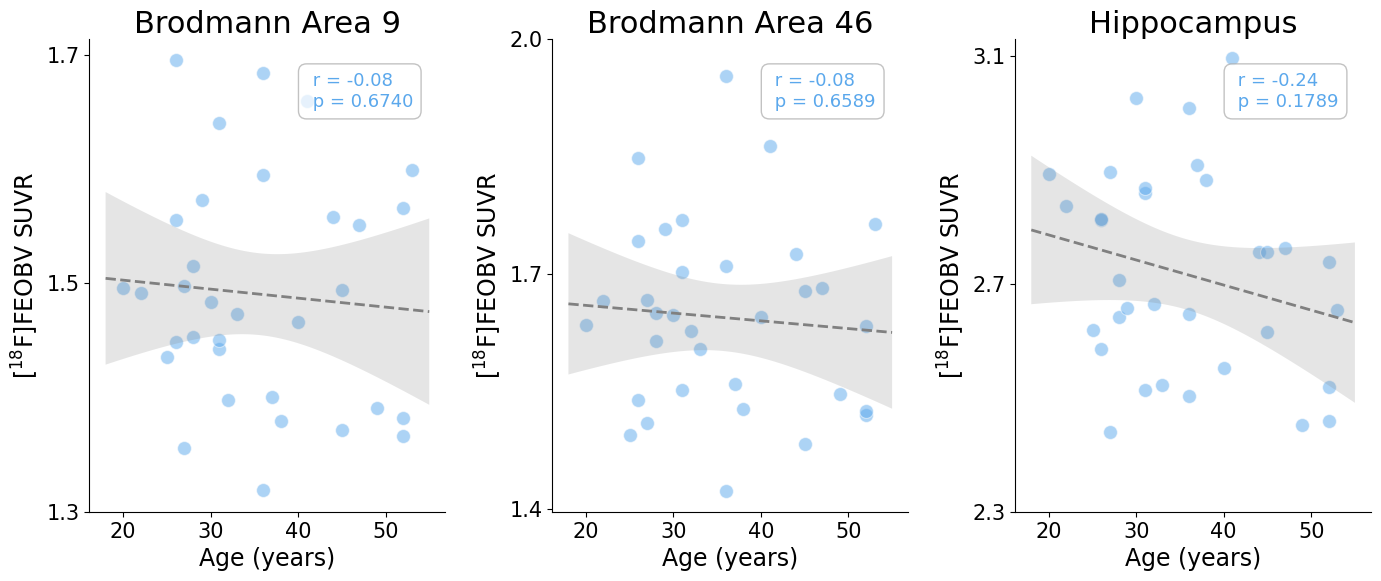

In [ ]:
####### Supplementary Figure 5: SUVRs by Age (Control Group)

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd



# Define ROI info
ROI_info = {
	'BA9': {'label': 'Brodmann Area 9', 'ROI_ticks': [1.3, 1.5, 1.7]},
	'Area_46': {'label': 'Brodmann Area 46', 'ROI_ticks': [1.4, 1.7, 2]},
	'HIP': {'label': 'Hippocampus', 'ROI_ticks': [2.3, 2.7, 3.1]},
}


# Variables
X_var = 'dem_age'
X_label = 'Age (years)'
xticks = [20,30,40,50]
prediction_lower = 18
prediction_upper = 55

# Colors
patient_color = '#5BA8EC'

# Load data
masterfile = pd.read_csv('data/masterfile_final_18patients_and_33controls.csv')
patients_only = masterfile[masterfile['Group'] == 'Control'].copy()

# Create figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for ax, ROI in zip(axes, ['BA9', 'Area_46', 'HIP']):
	subset = patients_only[[ROI, X_var]].dropna()
	
	# Fit linear model using statsmodels
	X = subset[X_var]
	y = subset[ROI]
	X_const = sm.add_constant(X)
	model = sm.OLS(y, X_const).fit()

	# Prediction range (EXTENDED)
	x_pred = np.linspace(prediction_lower, prediction_upper, 200)
	x_pred_const = sm.add_constant(x_pred)
	y_pred = model.predict(x_pred_const)

	# Confidence intervals (95%)
	pred_summary = model.get_prediction(x_pred_const).summary_frame(alpha=0.05)
	lower = pred_summary['mean_ci_lower']
	upper = pred_summary['mean_ci_upper']

	# Scatter
	sns.scatterplot(
		data=subset,
		x=X_var,
		y=ROI,
		color=patient_color,
		alpha=0.5,
		s=100,
		ax=ax
	)

	# Regression line
	ax.plot(x_pred, y_pred, color='grey', linestyle='--', linewidth=2)

	# Shaded confidence interval
	ax.fill_between(x_pred, lower, upper, color='grey', alpha=0.2, edgecolor='none')

	ax.set_title(f'{ROI_info[ROI]["label"]}', fontsize=22, pad=2)
	ax.set_ylabel(r'[$^{18}$F]FEOBV SUVR', fontsize=17)
	ax.set_yticks(ROI_info[ROI]['ROI_ticks'])
	ax.set_xlabel(X_label, fontsize=17)
	ax.set_xticks(xticks)
	# ax.set_xlim([-1.3, 0.7])
	ax.tick_params(axis='both', labelsize=15)
	sns.despine(ax=ax)

	# Correlation text
	r_val, p_val = stats.pearsonr(X, y)
	
	# Format p-value string
	if p_val < 0.0001:
		p_str = "p < 0.0001"
	else:
		p_str = f"p = {p_val:.4f}"
	
	ax.text(
		0.61, 0.93, f' r = {r_val:.2f}\n {p_str}',
		transform=ax.transAxes,
		fontsize=13,
		color=patient_color,
		verticalalignment='top',
		horizontalalignment='left',
		bbox=dict(boxstyle='round,pad=0.45', edgecolor='darkgrey', facecolor='white', alpha=0.7)
	)


# Save and show
plt.tight_layout(pad=5.0)
plt.subplots_adjust(wspace=0.3)

plt.savefig(f'plots/Suppl-Figure-5__ROI-SUVRs_by_{X_var}_(Control-group).jpg', dpi=700, bbox_inches='tight')
plt.show()

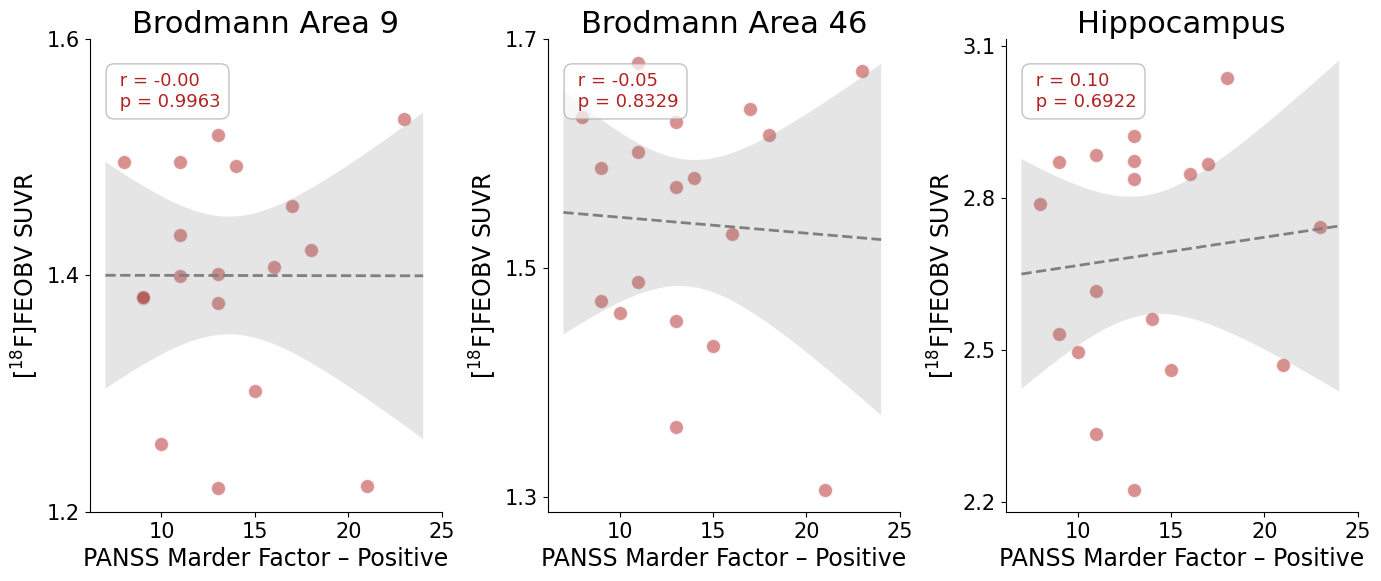

In [ ]:
####### Supplementary Figure 6: SUVRs by POSITIVE MARDER FACTORS (Patient Group)

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd


## Define ROI info
ROI_info = {
	'BA9': {'label': 'Brodmann Area 9', 'ROI_ticks': [1.2, 1.4, 1.6]},
	'BA46': {'label': 'Brodmann Area 46', 'ROI_ticks': [1.3, 1.5, 1.7]},
	'HIP': {'label': 'Hippocampus', 'ROI_ticks': [2.2, 2.5, 2.8, 3.1]},
}


## Variables
X_var = 'Marder_Positive'
X_label = 'PANSS Marder Factor – Positive'
prediction_lower = 7
prediction_upper = 24

## Colors
patient_color = '#B22222'

## Load data
masterfile = pd.read_csv('data/masterfile_final_18patients_and_33controls.csv')
patients_only = masterfile[masterfile['Group'] == 'Schizophrenia'].copy()

## Create figure with 3 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for ax, ROI in zip(axes, ['BA9', 'BA46', 'HIP']):
	subset = patients_only[[ROI, X_var]].dropna()
	
	# Fit linear model using statsmodels
	X = subset[X_var]
	y = subset[ROI]
	X_const = sm.add_constant(X)
	model = sm.OLS(y, X_const).fit()

	# Prediction range (EXTENDED)
	x_pred = np.linspace(prediction_lower, prediction_upper, 200)
	x_pred_const = sm.add_constant(x_pred)
	y_pred = model.predict(x_pred_const)

	# Confidence intervals (95%)
	pred_summary = model.get_prediction(x_pred_const).summary_frame(alpha=0.05)
	lower = pred_summary['mean_ci_lower']
	upper = pred_summary['mean_ci_upper']

	# Scatter
	sns.scatterplot(
		data=subset,
		x=X_var,
		y=ROI,
		color=patient_color,
		alpha=0.5,
		s=100,
		ax=ax
	)

	# Regression line
	ax.plot(x_pred, y_pred, color='grey', linestyle='--', linewidth=2)

	# Shaded confidence interval
	ax.fill_between(x_pred, lower, upper, color='grey', alpha=0.2, edgecolor='none')

	ax.set_title(f'{ROI_info[ROI]["label"]}', fontsize=22, pad=2)
	ax.set_ylabel(r'[$^{18}$F]FEOBV SUVR', fontsize=17)
	ax.set_yticks(ROI_info[ROI]['ROI_ticks'])
	ax.set_xlabel(X_label, fontsize=17)
	ax.set_xticks(xticks)
	# ax.set_xlim([-1.3, 0.7])
	ax.tick_params(axis='both', labelsize=15)
	sns.despine(ax=ax)

	# Correlation text
	r_val, p_val = stats.pearsonr(X, y)
	
	# Format p-value string
	if p_val < 0.0001:
		p_str = "p < 0.0001"
	else:
		p_str = f"p = {p_val:.4f}"
	
	ax.text(
		0.07, 0.93, f' r = {r_val:.2f}\n {p_str}',
		transform=ax.transAxes,
		fontsize=13,
		color=patient_color,
		verticalalignment='top',
		horizontalalignment='left',
		bbox=dict(boxstyle='round,pad=0.45', edgecolor='darkgrey', facecolor='white', alpha=0.7)
	)


## Save and show
plt.tight_layout(pad=5.0)
plt.subplots_adjust(wspace=0.3)

plt.savefig(f'plots/Suppl-Figure-6__ROI-SUVRs_by_{X_var}_(Patient-group).jpg', dpi=700, bbox_inches='tight')
plt.show()

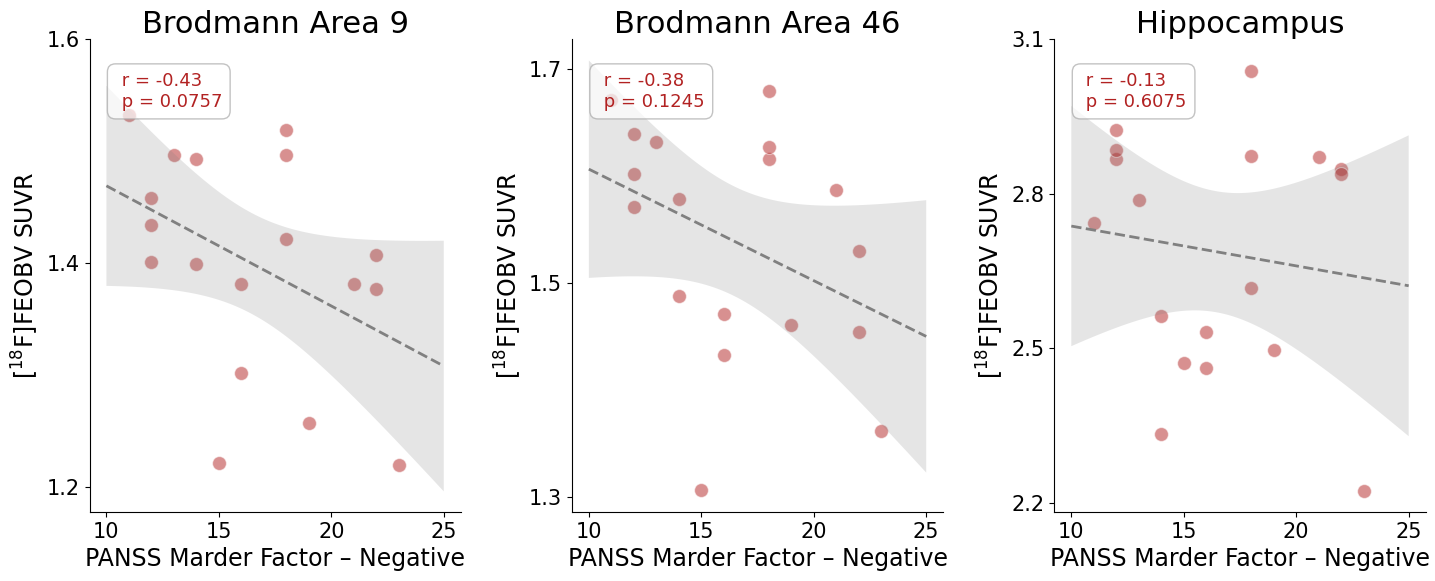

In [ ]:
####### Supplementary Figure 7: SUVRs by MARDER NEGATIVE FACTOR (Patient Group)

import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pandas as pd



## Define ROI info
ROI_info = {
	'BA9': {'label': 'Brodmann Area 9', 'ROI_ticks': [1.2, 1.4, 1.6]},
	'BA46': {'label': 'Brodmann Area 46', 'ROI_ticks': [1.3, 1.5, 1.7]},
	'HIP': {'label': 'Hippocampus', 'ROI_ticks': [2.2, 2.5, 2.8, 3.1]},
}

## Variables
X_var = 'Marder_Negative'
X_label = 'PANSS Marder Factor – Negative'
xticks = [10, 15, 20, 25]
prediction_lower = 10
prediction_upper = 25

# Colors
patient_color = '#B22222'

# Load data
masterfile = pd.read_csv('data/masterfile_final_18patients_and_33controls.csv')
patients_only = masterfile[masterfile['Group'] == 'Schizophrenia'].copy()

# Create figure with 2 subplots side-by-side
fig, axes = plt.subplots(1, 3, figsize=(15, 7))

for ax, ROI in zip(axes, ['BA9', 'BA46', 'HIP']):
	subset = patients_only[[ROI, X_var]].dropna()
	
	# Fit linear model using statsmodels
	X = subset[X_var]
	y = subset[ROI]
	X_const = sm.add_constant(X)
	model = sm.OLS(y, X_const).fit()

	# Prediction range (EXTENDED)
	x_pred = np.linspace(prediction_lower, prediction_upper, 200)
	x_pred_const = sm.add_constant(x_pred)
	y_pred = model.predict(x_pred_const)

	# Confidence intervals (95%)
	pred_summary = model.get_prediction(x_pred_const).summary_frame(alpha=0.05)
	lower = pred_summary['mean_ci_lower']
	upper = pred_summary['mean_ci_upper']

	# Scatter
	sns.scatterplot(
		data=subset,
		x=X_var,
		y=ROI,
		color=patient_color,
		alpha=0.5,
		s=100,
		ax=ax
	)

	# Regression line
	ax.plot(x_pred, y_pred, color='grey', linestyle='--', linewidth=2)

	# Shaded confidence interval
	ax.fill_between(x_pred, lower, upper, color='grey', alpha=0.2, edgecolor='none')

	ax.set_title(f'{ROI_info[ROI]["label"]}', fontsize=22, pad=2)
	ax.set_ylabel(r'[$^{18}$F]FEOBV SUVR', fontsize=17)
	ax.set_yticks(ROI_info[ROI]['ROI_ticks'])
	ax.set_xlabel(X_label, fontsize=17)
	ax.set_xticks(xticks)
	# ax.set_xlim([-1.3, 0.7])
	ax.tick_params(axis='both', labelsize=15)
	sns.despine(ax=ax)

	# Correlation text
	r_val, p_val = stats.pearsonr(X, y)
	
	# Format p-value string
	if p_val < 0.0001:
		p_str = "p < 0.0001"
	else:
		p_str = f"p = {p_val:.4f}"
	
	ax.text(
		0.07, 0.93, f' r = {r_val:.2f}\n {p_str}',
		transform=ax.transAxes,
		fontsize=13,
		color=patient_color,
		verticalalignment='top',
		horizontalalignment='left',
		bbox=dict(boxstyle='round,pad=0.45', edgecolor='darkgrey', facecolor='white', alpha=0.7)
	)


# Save and show
plt.tight_layout(pad=5.0)
plt.subplots_adjust(wspace=0.3, right=0.99)

plt.savefig(f'plots/Suppl-Figure-7__ROI-SUVRs_by_{X_var}_(Patient-group).jpg', dpi=700, bbox_inches='tight')
plt.show()


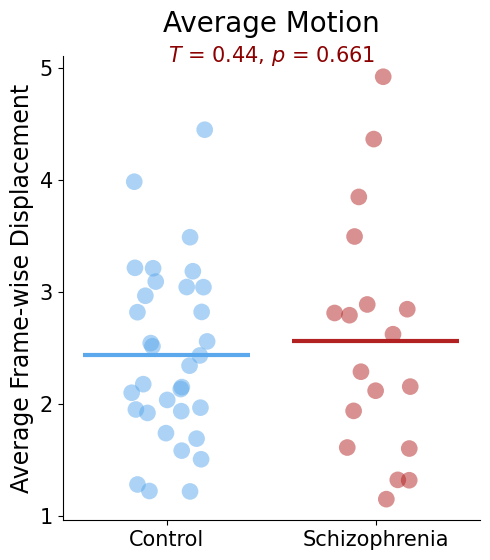

In [25]:
####### Supplementary Figure 8: Average Motion by Group

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

## Define colors
control_color = '#5BA8EC'
patient_color = '#B22222'

## Load data
masterfile = pd.read_csv('data/masterfile_final_18patients_and_33controls.csv')

plt.figure(figsize=(5, 5.7))
ax = plt.gca()

# Plot group means as short lines
group_means = masterfile.groupby('Group')['Average_FD'].mean()
for group, mean in group_means.items():
	color = control_color if group == 'Control' else patient_color
	x_position = 0 if group == 'Control' else 1
	ax.hlines(mean, xmin=x_position - 0.4, xmax=x_position + 0.4, color=color, lw=3)

# Plot data points (scatter/stripplot)
sns.stripplot(data=masterfile, x='Group', y='Average_FD', jitter=0.2, hue='Group', 
			palette=sns.color_palette([control_color, patient_color]), alpha=0.5, size=12, ax=ax, dodge=False)

# Perform t-test and get T-value and p-value
controls = masterfile[masterfile['Group'] == 'Control']['Average_FD']
chronic_patients = masterfile[masterfile['Group'] == 'Schizophrenia']['Average_FD']
ttest_result = pg.ttest(chronic_patients, controls)
t_value = ttest_result['T'].iloc[0]
p_value = ttest_result['p-val'].iloc[0]

# Format T and p values to 2 decimal places
t_value_formatted = f"$\\mathit{{T}}$ = {t_value:.2f}"
p_value_formatted = f"$\\mathit{{p}}$ = {p_value:.3f}"

# Add T-value and p-value to the plot
ax.text(0.5, max(masterfile['Average_FD']) + 0.13,
		f"{t_value_formatted}, {p_value_formatted}", 
		color='darkred', fontsize=15, ha='center')

ax.tick_params(axis='both', labelsize=15)

plt.xlabel('')
plt.ylabel('Average Frame-wise Displacement', fontsize=17)
plt.yticks([1.0, 2.0, 3.0, 4.0, 5.0])
plt.title('Average Motion', fontsize=20, pad=17)
sns.despine(ax=ax, top=True, right=True)
plt.tight_layout()
plt.savefig('plots/Suppl-Figure-8__average_motion_by_Group.png', dpi=700, bbox_inches='tight')
plt.show()

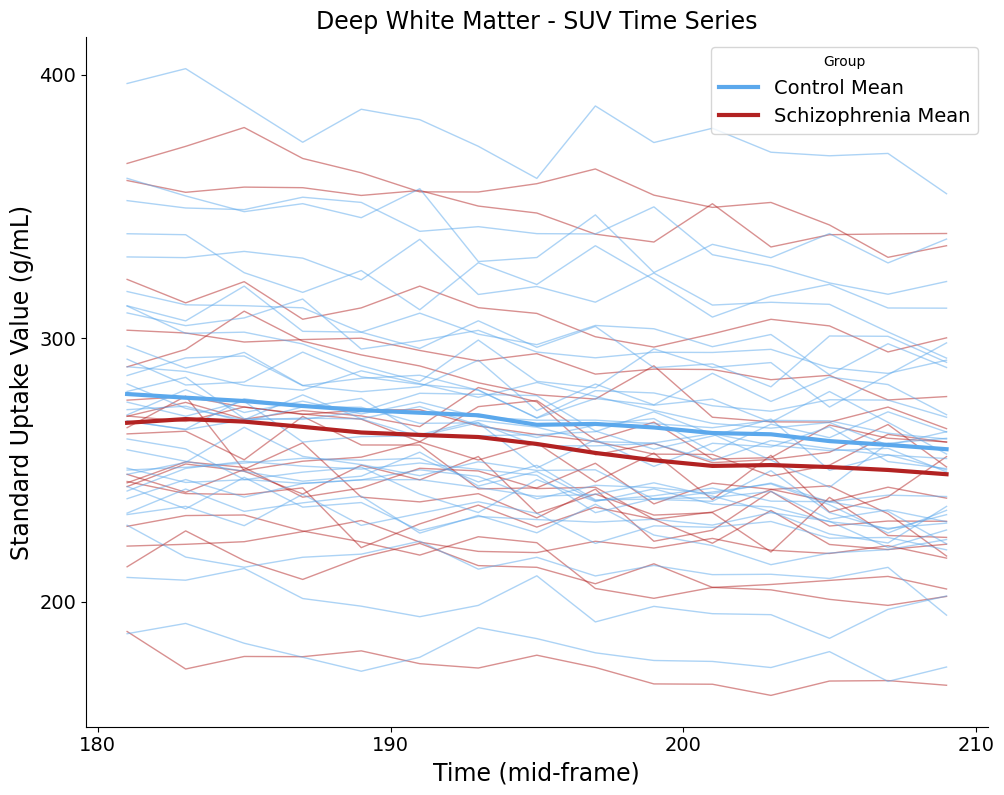

In [ ]:
####### Supplementary Figure 9: Reference Region SUV time series

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

## subject lists
patients = [
	"FEOBV502", "FEOBV504", "FEOBV507", "FEOBV508", "FEOBV512", 
	"FEOBV513", "FEOBV515", "FEOBV517", "FEOBV521", "FEOBV522", 
	"FEOBV523", "FEOBV527", "FEOBV529", "FEOBV531", "FEOBV533", 
	"FEOBV537", "FEOBV538", "FEOBV543",
]
controls = [
	"FEOBV002", "FEOBV004", "FEOBV005", "FEOBV006", "FEOBV008", "FEOBV010", 
	"FEOBV013", "FEOBV017", "FEOBV020", "FEOBV021", "FEOBV022", "FEOBV023", 
	"FEOBV024", "FEOBV025", "FEOBV026", "FEOBV027", "FEOBV028", "FEOBV029", 
	"FEOBV030", "FEOBV032", "FEOBV033", "FEOBV036", "FEOBV040", "FEOBV041", 
	"FEOBV042", "FEOBV043", "FEOBV044", "FEOBV046", "FEOBV048", "FEOBV049", 
	"FEOBV051", "FEOBV053", "FEOBV054"
]
subjects = patients + controls

group_map = {ID: "Schizophrenia" for ID in patients}
group_map.update({ID: "Control" for ID in controls})

## paths
data_dir	= '/Users/zsaint/FEOBV/results/4D/'
mf_path		= '/Users/zsaint/Documents/NotebookS/data/masterfile_final_18patients_and_33controls.csv'
num_frames	= 15  # frames 0000–0014

## data
mf = pd.read_csv(mf_path).set_index('ID')

## Read raw activity time‐series for each subject
activity_raw = {}
for ID in subjects:
	raw = []
	for i in range(num_frames):
		fname = f"{ID}_wm_ref_region_activity_{i:04d}"
		path  = os.path.join(data_dir, fname)
		if os.path.exists(path):
			arr = np.loadtxt(path)
			# if the file contains multiple values, take the mean; else it's a single number
			v = float(np.mean(arr)) if isinstance(arr, np.ndarray) else float(arr)
		else:
			print(f"Warning: {fname} not found")
			v = np.nan
		raw.append(v)
	activity_raw[ID] = raw

## Compute SUV time‐series
suv_data = {}
for ID, raw in activity_raw.items():
	if ID not in mf.index:
		print(f"Warning: {ID} missing from masterfile")
		continue
	dose   = mf.at[ID, 'injected_dose']			# MBq
	weight = mf.at[ID, 'participant_weight']	# kg
	factor = dose / weight						# MBq/kg
	# divide each frame's activity (Bq/mL) by factor ⇒ SUV
	suv_ts = [v / factor if not np.isnan(v) else np.nan for v in raw]
	suv_data[ID] = suv_ts


suv_df = pd.DataFrame(suv_data, index=range(num_frames))
suv_df.index.name = 'frame'

suv_long = (
	suv_df
	.reset_index()
	.melt(id_vars='frame', var_name='ID', value_name='SUV')
)
suv_long['Group'] = suv_long['ID'].map(group_map)

## Plot SUV time‐series with group‐mean overlays
colors = {
	'Control':'#5BA8EC',
	'Schizophrenia':'#B22222'}
# 'mid-frame' times
times = [181, 183, 185, 187, 189, 191, 193, 195, 197, 199, 201, 203, 205, 207, 209]


plt.figure(figsize=(10,8))
# individual traces
for ID in subjects:
	grp = group_map.get(ID)
	if ID in suv_df.columns:
		plt.plot(times, suv_df[ID],
				 color=colors[grp], alpha=0.5, linewidth=1)

# group means
ctrl_ids = [ID for ID in subjects if group_map[ID]=='Control']
schz_ids = [ID for ID in subjects if group_map[ID]=='Schizophrenia']
mean_ctrl = suv_df[ctrl_ids].mean(axis=1)
mean_schz = suv_df[schz_ids].mean(axis=1)


plt.plot(times, mean_ctrl, color=colors['Control'],
		linewidth=3, label='Control Mean')
plt.plot(times, mean_schz, color=colors['Schizophrenia'],
		linewidth=3, label='Schizophrenia Mean')

plt.xlabel('Time (mid-frame)', fontsize=17)
plt.ylabel('Standard Uptake Value (g/mL)', fontsize=17)
plt.title('Deep White Matter - SUV Time Series', fontsize=17)
plt.legend(title='Group', fontsize=14)
plt.tight_layout()
plt.xticks([180, 190, 200, 210], fontsize=14)
plt.yticks([200, 300, 400], fontsize=14)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('plots/Suppl-Figure-9__reference-region_Time-series.png', dpi=300, bbox_inches='tight')
plt.show()